In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate Dataset

In [2]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.02740565, -0.90343927,  0.1582491 , -0.74798265, -0.93932793,
        0.23727248,  0.49840955,  0.6265212 ,  0.44178385,  0.54969007])

In [3]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.07065834,  0.23353219, -0.92772058,  0.87738398,  0.03428456,
       -0.4528623 , -0.17488625, -0.24160863, -0.40570238,  0.28957856])

In [4]:
# True == 1, False == 0
y = x1 * 0.3 + x2 * 0.5 + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.2)
y = y >= 0.0

print(y.shape)
y[0:10]

(100,)


array([False, False, False,  True, False, False,  True,  True, False,  True], dtype=bool)

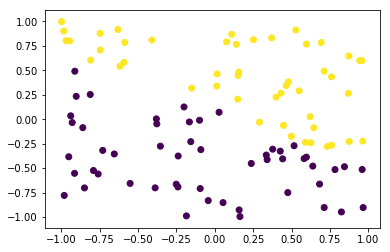

In [5]:
plt.scatter(x1, x2, c=y)

### Gradient Descent

In [6]:
# def => define
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.000123394575986
0.5
0.999876605424


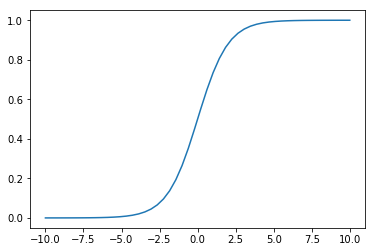

In [7]:
xx = np.linspace(start=-10.0, stop=+10.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [8]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = (y_predict >= 0.5)
    actual = y

    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))

    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("----" * 10)
print("{0} error = {1:.5f}".format(epoch, error))

 0 error = 0.35000
10 error = 0.08000
20 error = 0.08000
30 error = 0.08000
40 error = 0.08000
50 error = 0.06000
60 error = 0.06000
70 error = 0.06000
80 error = 0.04000
90 error = 0.04000
----------------------------------------
99 error = 0.04000


In [9]:
import pandas as pd

y_predict = x1 * w1 + x2 * w2 + b
y_predict = sigmoid(y_predict)

predict = (y_predict >= 0.5)

pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict}).head(10)

,x1,x2,y(actual),y(predict)
0,0.027406,0.070658,False,True
1,-0.903439,0.233532,False,False
2,0.158249,-0.927721,False,False
3,-0.747983,0.877384,True,True
4,-0.939328,0.034285,False,False
5,0.237272,-0.452862,False,False
6,0.498410,-0.174886,True,True
7,0.626521,-0.241609,True,False
8,0.441784,-0.405702,False,False
9,0.549690,0.289579,True,True


In [10]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

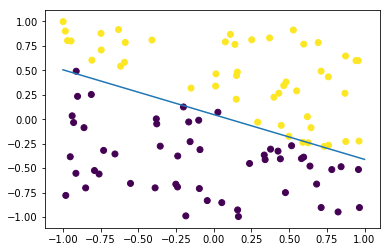

In [11]:
plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

### Multi-class Classification (w/ IRIS Dataset)
  * see [this link](https://archive.ics.uci.edu/ml/datasets/iris)

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
X = iris["data"]
print(X.shape)
X[0:10]

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [14]:
y = iris["target"]
print(y.shape)
y[0:10]

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
data = pd.DataFrame(X, columns=iris['feature_names'])
data["y"] = y

print(data.shape)
data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


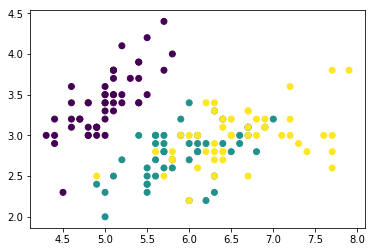

In [16]:
plt.scatter(data["sepal length (cm)"], data["sepal width (cm)"], c=y)

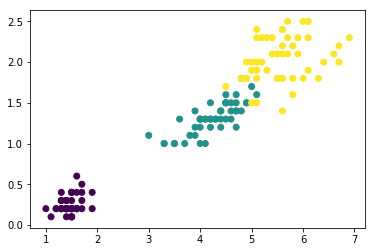

In [17]:
plt.scatter(data["petal length (cm)"], data["petal width (cm)"], c=y)

In [18]:
y_hot = np.eye(3)[y]

print(y_hot.shape)
y_hot[0:5]

(150, 3)


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### Gradient Descent

In [19]:
num_epoch = 100
learning_rate = 0.01

w = np.random.uniform(low=0.0, high=1.0, size=(4, 3))
b = np.random.uniform(low=0.0, high=1.0, size=3)

for epoch in range(num_epoch):
    y_predict_hot = X.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)    
    y_predict = y_predict_hot.argmax(axis=1)

    error = (y != y_predict).mean()
    if error < 0.1:
        break
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    w = w - learning_rate * X.T.dot(y_predict_hot - y_hot)
    b = b - learning_rate * (y_predict_hot - y_hot).mean(axis=0)
    
print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.92000
10 error = 0.50667
20 error = 0.35333
30 error = 0.33333
40 error = 0.33333
50 error = 0.33333
----------------------------------------
55 error = 0.04667


In [20]:
y_predict_hot = X.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)    
y_predict = y_predict_hot.argmax(axis=1)

result = data.copy()
result["y(predict)"] = y_predict

print(result.shape)
result.head(10)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y(predict)
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


## MNIST Dataset
  * see [this link](http://yann.lecun.com/exdb/mnist/)

In [21]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Using TensorFlow backend.


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


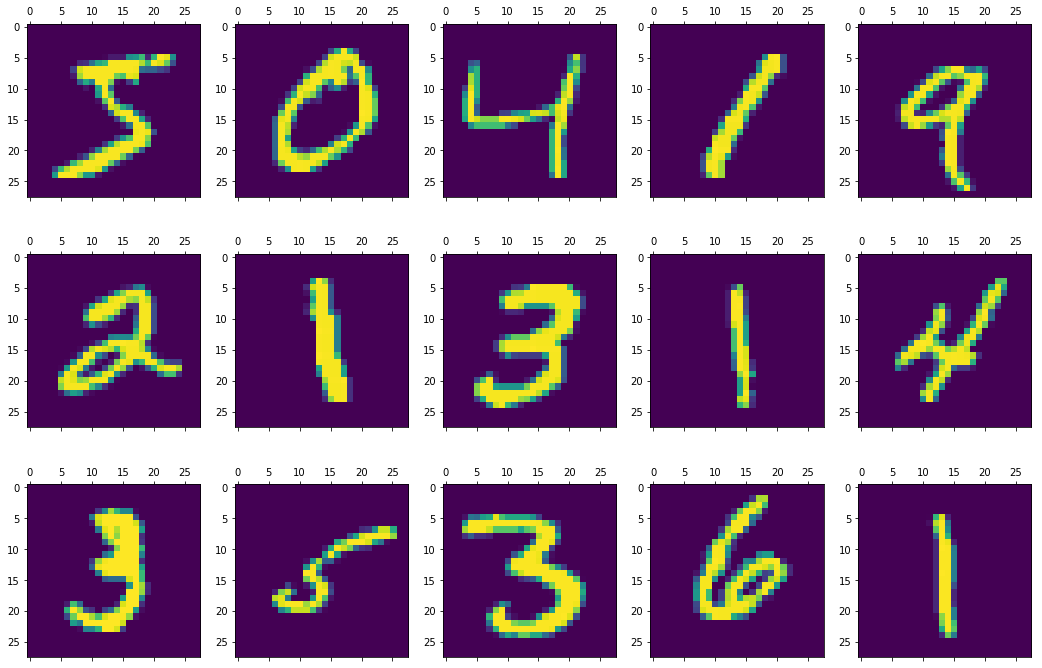

In [22]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

## Preprocessing

In [23]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [24]:
y_train_hot = np.eye(10)[y_train]

print(y_train_hot.shape)
y_train_hot[0:5]

(60000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [25]:
y_test_hot = np.eye(10)[y_test]

print(y_test_hot.shape)
y_test_hot[0:5]

(10000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])